In [2]:
# Code modified and fixed from Stock Technical Analysis with Python
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
import numpy as np

In [69]:
df = pd.read_csv("./btchourly.csv")
df.index = pd.to_datetime(df.utc)
del df['utc']

In [70]:
df.index

DatetimeIndex(['2017-11-20 00:00:00', '2017-11-20 01:00:00', '2017-11-20 02:00:00', '2017-11-20 03:00:00', '2017-11-20 04:00:00', '2017-11-20 05:00:00', '2017-11-20 06:00:00', '2017-11-20 07:00:00', '2017-11-20 08:00:00', '2017-11-20 09:00:00',
               ...
               '2018-02-10 14:00:00', '2018-02-10 15:00:00', '2018-02-10 16:00:00', '2018-02-10 17:00:00', '2018-02-10 18:00:00', '2018-02-10 19:00:00', '2018-02-10 20:00:00', '2018-02-10 21:00:00', '2018-02-10 22:00:00', '2018-02-10 23:00:00'], dtype='datetime64[ns]', name='utc', length=1992, freq=None)

In [71]:
#df = df.loc['2017-11-20T06:00:00':'2017-12-01T23:59:00']

In [80]:
tradeperiod = df.index.max() - df.index.min()
(tradeperiod / np.timedelta64(1, 'h')).astype(int)

1991

In [72]:
df.tail()

,close,high,low,open,vol
utc,,,,,
2018-02-10 19:00:00,8569.29,8595.01,8498.34,8575.76,3902.20
2018-02-10 20:00:00,8408.29,8573.35,8320.56,8569.32,6089.25
2018-02-10 21:00:00,8272.61,8416.75,8189.88,8408.21,6631.15
2018-02-10 22:00:00,8267.21,8303.97,8195.10,8272.61,3338.20
2018-02-10 23:00:00,8051.65,8268.43,8030.55,8267.21,10577.33


In [67]:
df.describe()

,close,high,low,open,vol
count,282.000000,282.000000,282.000000,282.000000,282.000000
mean,9096.567305,9158.243901,9021.039574,9086.298262,4652.742943
std,924.717592,957.725915,886.569034,920.363770,3056.562795
min,7858.720000,7996.050000,7819.060000,7858.710000,12.420000
25%,8210.610000,8243.665000,8182.035000,8209.045000,2733.612500
50%,8931.385000,8959.605000,8873.305000,8915.545000,3757.755000
75%,9854.437500,9909.802500,9691.800000,9848.950000,5582.182500
max,11190.490000,11417.840000,11145.920000,11193.770000,23064.860000


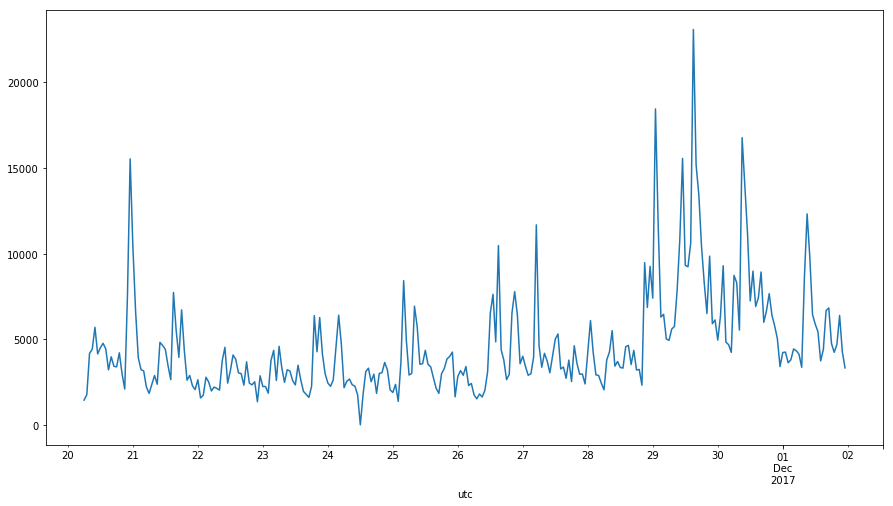

In [68]:
df.vol.plot(figsize=(15,8))

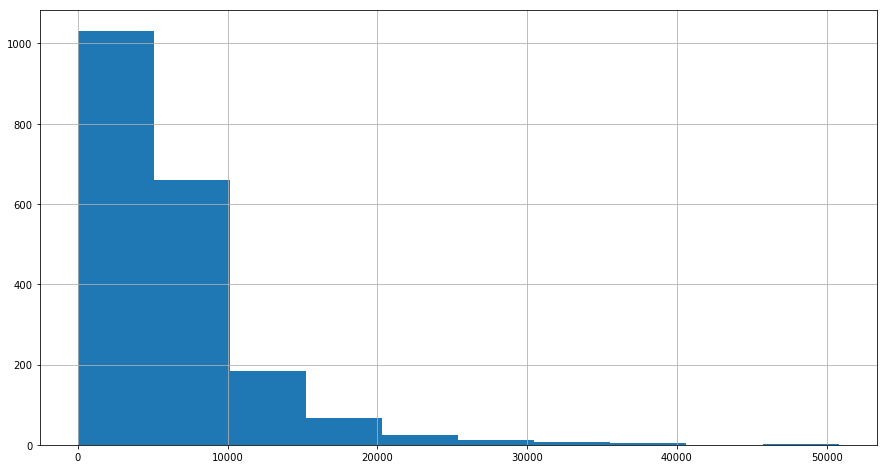

In [38]:
df.vol.hist(figsize=(15,8))

In [39]:
df.to_csv('./btchourly-modified.csv')

In [40]:
df = pd.read_csv("./btchourly-modified.csv")

In [41]:
import talib as ta

In [42]:
df['bb_high'],df['bb_mid'],df['bb_low'] = ta.BBANDS(np.asarray(df.close),
                                                  timeperiod=7,nbdevup=1.3,nbdevdn=1.3,matype=0)

In [43]:
df['rsi'] = ta.RSI(np.asarray(df.close),timeperiod=14)

In [44]:
df['close_lag1'] = df.close.shift(1)
df['vol_lag1'] = df.vol.shift(1)
df['bb_low_lag1'] = df.bb_low.shift(1)
df['bb_mid_lag1'] = df.bb_mid.shift(1)
df['bb_high_lag1'] = df.bb_high.shift(1)
df['close_lag2'] = df.close.shift(2)
df['vol_lag2'] = df.vol.shift(2)
df['bb_low_lag2'] = df.bb_low.shift(2)
df['bb_mid_lag2'] = df.bb_mid.shift(1)
df['bb_high_lag2'] = df.bb_high.shift(2)
df['rsi_lag1'] = df.rsi.shift(1)
df['rsi_lag2'] = df.rsi.shift(2)

In [47]:
df[30:31]

,utc,close,high,low,open,vol,bb_high,bb_mid,bb_low,rsi,...,bb_low_lag1,bb_mid_lag1,bb_high_lag1,close_lag2,vol_lag2,bb_low_lag2,bb_mid_lag2,bb_high_lag2,rsi_lag1,rsi_lag2
30,2017-11-21 06:00:00,8186.81,8214.21,8177.95,8213.73,1846.73,8255.654767,8107.115714,7958.576662,55.680229,...,7897.167708,8065.587143,8234.006578,8193.34,3151.3,7897.682932,8065.587143,8199.64564,57.765161,56.622782


In [54]:
df.utc = pd.to_datetime(df.utc)

In [59]:
tradeperiod = df.utc.max() - df.utc.min()

In [62]:
(1-.23)**(82/365)-1

-0.057026938391176896

In [82]:
(tradeperiod / np.timedelta64(1, 'h')).astype(int)

1991

In [83]:
len(df)

1992